### Madina Hayva Putri - 5220411187
### Pemrosesan Teks Praktik Kelas B

In [60]:
!pip install bertopic

In [61]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

In [62]:
df = pd.read_csv('data1000.csv', encoding='latin-1')
df.head()

,nama_channel,judul_video,author,komentar,casefolding,stripping,normalisasi,tokenizing,stopword_removal,stemming,no_repeated,token_list,final_tokens,final_cleaned
0,INDIRA KALISTHA,REVIEW JUJUR MAKANAN TIKTOKERS! RASANYA KOK GI...,@Nnnayla-w2y,Mbala cobain seblak instan tiktokers juga,mbala cobain seblak instan tiktokers juga,mbala cobain seblak instan tiktokers juga,mbala cobain seblak instan tiktokers juga,"['mbala', 'cobain', 'seblak', 'instan', 'tikto...","['mbala', 'cobain', 'seblak', 'instan', 'tikto...","['mbala', 'cobain', 'seblak', 'instan', 'tikto...","['mbala', 'cobain', 'seblak', 'instan', 'tikto...","['mbala', 'cobain', 'seblak', 'instan', 'tikto...","['mbala', 'cobain', 'seblak', 'instan', 'tikto...",mbala cobain seblak instan tiktokers
1,Mia Oktavia Chandra,COBAIN MAKANAN YANG SEMPAT VIRAL DI FYP TIKTOK,@oohHani,"Ngapasih orang2 kalo mau bilang ""ini kriuk"" aj...","ngapasih orang2 kalo mau bilang ""ini kriuk"" aj...","ngapasih orang2 kalo mau bilang ""ini kriuk"" aj...","ngapasih orang2 kalau mau bilang ""ini kriuk"" s...","['ngapasih', 'orang2', 'kalau', 'mau', 'bilang...","['ngapasih', 'orang2', 'bilang', 'kriuk', 'kud...","['ngapasih', 'orang2', 'bilang', 'kriuk', 'kud...","['ngapasih', 'orang2', 'bilang', 'kriuk', 'kud...","['ngapasih', 'orang2', 'bilang', 'kriuk', 'kud...","['ngapasih', 'orang2', 'bilang', 'kriuk', 'kud...",ngapasih orang2 bilang kriuk kudu dikadih kriu...
2,Mia Oktavia Chandra,COBAIN JUALAN TIKTOKERS ENAK GA YA,@FernaYanti-q1h,Kak aku tantang 24 jam coba semua makanan dari...,kak aku tantang 24 jam coba semua makanan dari...,kak aku tantang 24 jam coba semua makanan dari...,kak aku tantang 24 jam coba semua makanan dari...,"['kak', 'aku', 'tantang', '24', 'jam', 'coba',...","['kak', 'tantang', '24', 'jam', 'coba', 'makan...","['kak', 'tantang', '24', 'jam', 'coba', 'makan...","['kak', 'tantang', '24', 'jam', 'coba', 'makan...","['kak', 'tantang', '24', 'jam', 'coba', 'makan...","['tantang', 'coba', 'makan', 'molysnaks']",tantang coba makan molysnaks
3,Mia Oktavia Chandra,SEHARIAN MAKAN DI ATUR FYP TIKTOK SERU BANGET,@alifaayudia9699,di gelato ada lo kaj,di gelato ada lo kaj,di gelato ada lo kaj,di gelato ada lo kaj,"['di', 'gelato', 'ada', 'lo', 'kaj']","['gelato', 'lo', 'kaj']","['gelato', 'lo', 'kaj']","['gelato', 'lo', 'kaj']","['gelato', 'lo', 'kaj']",['gelato'],gelato
4,Mia Oktavia Chandra,COBAIN JUALAN TIKTOKERS ENAK GA YA,@inaaagsta,"""cabe nya masi kasar,diulek alus gitu"" diulek ...","""cabe nya masi kasar,diulek alus gitu"" diulek ...","""cabe nya masi kasar,diulek alus gitu"" diulek ...","""cabe nya masi kasar,diulek alus gitu"" diulek ...","['cabe', 'nya', 'masi', 'kasar', 'diulek', 'al...","['cabe', 'nya', 'masi', 'kasar', 'diulek', 'al...","['cabe', 'nya', 'mas', 'kasar', 'ulek', 'alus'...","['cabe', 'nya', 'mas', 'kasar', 'ulek', 'alus'...","['cabe', 'nya', 'mas', 'kasar', 'ulek', 'alus'...","['cabe', 'kasar', 'ulek', 'alus', 'gitu', 'ule...",cabe kasar ulek alus gitu ulek kasar kali cabe...


In [63]:
#cek jumlah baris dan kolom
df.shape

(1000, 14)

In [64]:
#cek data kosong
df.isnull().sum()

,0
nama_channel,0
judul_video,0
author,0
komentar,0
casefolding,0
stripping,0
normalisasi,0
tokenizing,0
stopword_removal,0
stemming,0


In [65]:
#cek data yang sama
df.duplicated().any()

np.False_

In [66]:
# vektorisasi TF-IDF
sentence = df['final_cleaned']
vectorizer = TfidfVectorizer()
vectorized_documents = vectorizer.fit_transform(sentence)

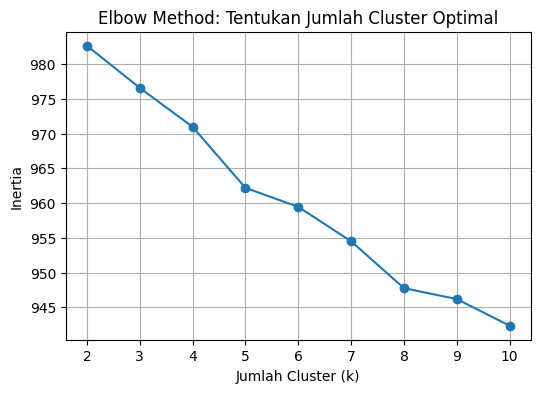

In [67]:
# elbow method
def elbow_method(vectorized_documents, max_k =10):
  inertia = []
  for k in range(2, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vectorized_documents)
    inertia.append(kmeans.inertia_)
  plt.figure(figsize=(6, 4))
  plt.plot(range(2, max_k+1), inertia, marker='o')
  plt.title('Elbow Method: Tentukan Jumlah Cluster Optimal')
  plt.xlabel('Jumlah Cluster (k)')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()
elbow_method(vectorized_documents)

In [68]:
# mengurangi dimensi menggunakan PCA
pca= PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents)

In [69]:
# algoritma k-means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit(vectorized_documents)

In [70]:
# menyimpan di dataframe
results = pd.DataFrame()
results['komentar'] = sentence
results['cluster'] = kmeans.labels_

print(results.sample(10))

                                              komentar  cluster
735                                  salfok cardiganya        1
827  beli mana guys smua tarik banget basreng ciren...        2
764  cobain dimsum mentai rating buruk ngiler makan...        4
729                              jando lemak susu sapi        1
341  saran kamera deketin lagi kejauahan banget dud...        1
250                                        sayur oyong        1
620                        ngiler banget makaroni plis        2
129          odeng kantin jarak enak banget harga 25rb        2
525                    ngiler astaga makan babi wkwkwk        1
679                                      suka kontenya        2


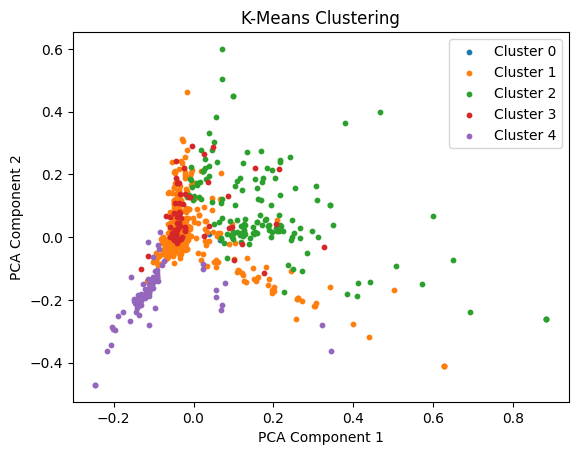

In [71]:
# visualisasi klaster
colors = [cm.tab10(i) for i in range(k)]
cluster_labels_gen = [f'Cluster {i}' for i in range(k)]
for i in range(k):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=cluster_labels_gen[i])
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering')
plt.show()

In [72]:
# Memuat model Sentence-BERT yang sudah dilatih sebelumnya
model = SentenceTransformer('all-MiniLM-L6-v2')

# Menghasilkan sentence embeddings dari kolom 'final_cleaned'
document_embeddings = model.encode(df['final_cleaned'].tolist())

print("Sentence embeddings berhasil dibuat.")
print(f"Dimensi document_embeddings: {document_embeddings.shape}")

Sentence embeddings berhasil dibuat.
Dimensi document_embeddings: (1000, 384)


In [73]:
# topic modeling
bertopic_model = BERTopic(language='indonesian', calculate_probabilities=True, verbose=True)
topics, probabilities = bertopic_model.fit_transform(df['final_cleaned'].tolist(),
                                                     embeddings=document_embeddings)

df['bertopic_cluster_label'] = topics

print("BERTopic Clustering berhasil diterapkan.")
print("Distribusi cluster:")
print(df['bertopic_cluster_label'].value_counts())

# Menampilkan informasi topik yang dihasilkan
print("\nTopik teratas:")
display(bertopic_model.get_topic_info())

2025-12-15 09:19:10,467 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-15 09:19:18,086 - BERTopic - Dimensionality - Completed ✓
2025-12-15 09:19:18,097 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-15 09:19:18,259 - BERTopic - Cluster - Completed ✓
2025-12-15 09:19:18,276 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-15 09:19:18,319 - BERTopic - Representation - Completed ✓


BERTopic Clustering berhasil diterapkan.
Distribusi cluster:
bertopic_cluster_label
0    883
1    105
2     12
Name: count, dtype: int64

Topik teratas:


,Topic,Count,Name,Representation,Representative_Docs
0,0,883,0_makan_banget_tasyi_enak,"[makan, banget, tasyi, enak, review, suka, bel...","[chikuro emang enak banget banget banget, oran..."
1,1,105,1_cobain_viral_tasyi_cimod,"[cobain, viral, tasyi, cimod, dong, maudy, aya...","[cobain cimod, cobain, cobain]"
2,2,12,2_baby_lobster_crab_ntah,"[baby, lobster, crab, ntah, chewy, crispy, sna...",[tasyi cobain yutuk dong garing enak tajem bab...


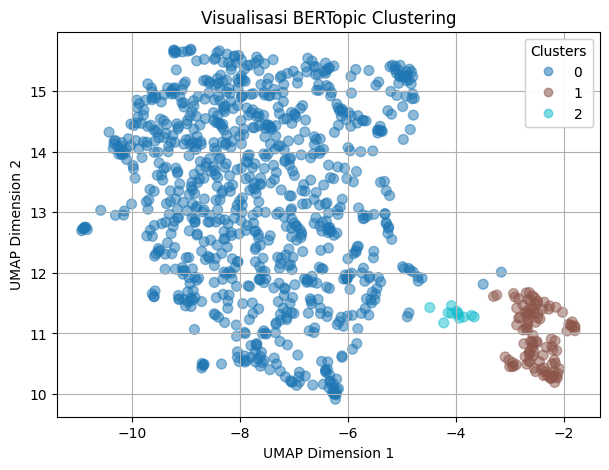

In [74]:
# Visualisasi Topic Modeling
import matplotlib.pyplot as plt
import umap

umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = umap_reducer.fit_transform(document_embeddings)


plt.figure(figsize=(7, 5))
scatter= plt.scatter(
    umap_embeddings[:, 0],
    umap_embeddings[:, 1],
    c=df['bertopic_cluster_label'],
    cmap='tab10',
    s=50,
    alpha=0.5,
    label='Clusters'
)

plt.title("Visualisasi BERTopic Clustering")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.grid(True)
plt.show()